### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [26]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory Data**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Feature Engineering**

In [8]:
dataset.duplicated().sum()


0

In [9]:
dataset.isnull().sum()


,0
Hours,0
Scores,0



Outlier Analysis (Jumlah Outlier per Kolom):
Hours     0
Scores    0
dtype: int64


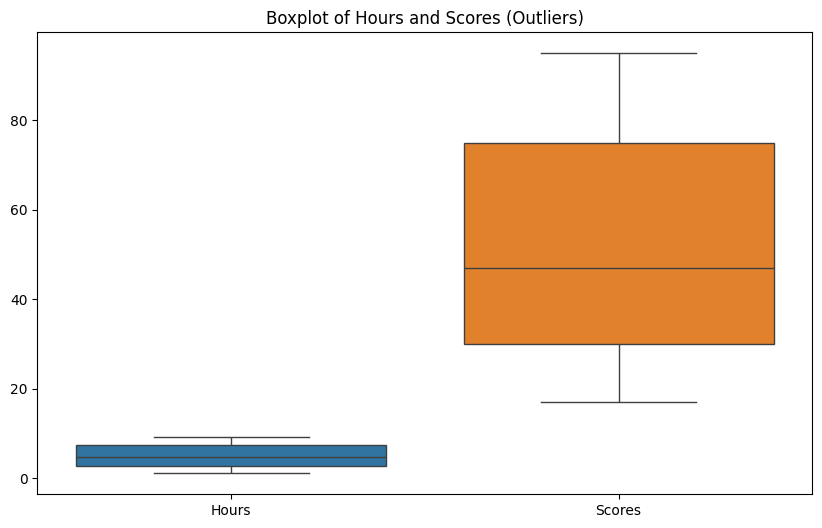

In [10]:
# Outlier Analysis using IQR (Interquartile Range)
Q1 = dataset.quantile(0.25)  # Kuartil pertama (25%)
Q3 = dataset.quantile(0.75)  # Kuartil ketiga (75%)
IQR = Q3 - Q1  # Rentang interkuartil

# Mendefinisikan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier berdasarkan batas bawah dan atas
outliers = (dataset < lower_bound) | (dataset > upper_bound)

# Menampilkan jumlah outlier per kolom
print("\nOutlier Analysis (Jumlah Outlier per Kolom):")
print(outliers.sum())

# Visualizing Outliers with Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset)
plt.title('Boxplot of Hours and Scores (Outliers)')
plt.show()


**Modeling**

In [34]:
X = dataset[['Hours']]
y = dataset['Scores']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_linear = linear_model.predict(X_test)

In [18]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [20]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R²): {r2_linear}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 18.943211722315272
R-squared (R²): 0.9678055545167994


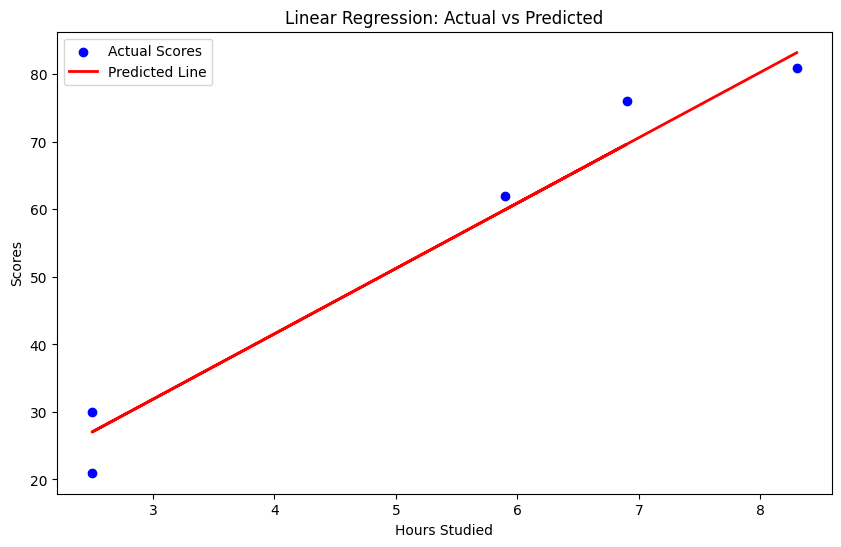

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted Line')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [27]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred_rf = random_forest_model.predict(X_test)

In [29]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [30]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 13.045153611111104
R-squared (R²): 0.9778294466160586


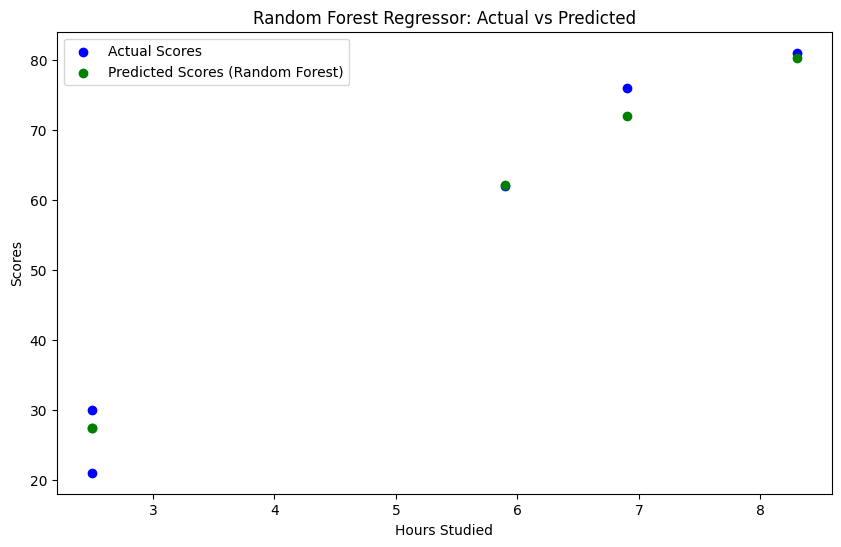

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.scatter(X_test, y_pred_rf, color='green', label='Predicted Scores (Random Forest)')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Model Evaluation**

In [32]:
if r2_rf > r2_linear:
    print("\nThe Random Forest Regressor performs better based on R-squared.")
elif r2_rf < r2_linear:
    print("\nThe Linear Regression model performs better based on R-squared.")
else:
    print("\nBoth models perform equally well based on R-squared.")


The Random Forest Regressor performs better based on R-squared.


In [33]:
# Kesimpulan evaluasi model
print("Kesimpulan:")
print("\n- Tidak ada data duplikat")
print("- Tidak ada missing values")
print("- Terdapat korelasi positif antara jam belajar dan skor")
print("\nBerdasarkan evaluasi model:")

# Hasil evaluasi Linear Regression
print(f"\n- Linear Regression: R² = {r2_linear:.2f}, MSE = {mse_linear:.2f}")

# Hasil evaluasi Random Forest Regressor
print(f"- Random Forest Regressor: R² = {r2_rf:.2f}, MSE = {mse_rf:.2f}")

# Kesimpulan model terbaik
if r2_rf > r2_linear:
    print(f"\nModel terbaik adalah Random Forest Regressor dengan R² tertinggi ({r2_rf:.2f}) dan MSE terendah ({mse_rf:.2f}).")
elif r2_rf < r2_linear:
    print(f"\nModel terbaik adalah Linear Regression dengan R² tertinggi ({r2_linear:.2f}) dan MSE terendah ({mse_linear:.2f}).")
else:
    print("\nKedua model memiliki performa yang sama.")


Kesimpulan:

- Tidak ada data duplikat
- Tidak ada missing values
- Terdapat korelasi positif antara jam belajar dan skor

Berdasarkan evaluasi model:

- Linear Regression: R² = 0.97, MSE = 18.94
- Random Forest Regressor: R² = 0.98, MSE = 13.05

Model terbaik adalah Random Forest Regressor dengan R² tertinggi (0.98) dan MSE terendah (13.05).
